In [10]:
!pip install yfinance

  Using cached yfinance-0.2.51-py2.py3-none-any.whl (104 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     -------------------------------------- 948.2/948.2 kB 9.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=f7da9a3a46b0e63e6e6f4fe2c7ad1f872ffe89c0601d3d043e3123fcfa307252
  Stored in directory: c:\users\shedrack\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully built peewe

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [11]:
import yfinance as yf
import pandas as pd

# Define the cryptocurrency ticker
crypto_ticker = "BTC-USD"  # Bitcoin in USD
start_date = "2020-01-01"  # Specify the start date
end_date = "2025-01-01"    # Specify the end date

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

# Display the first few rows
print(data.head())

# Save to CSV for future use
data.to_csv("crypto_data.csv")
print("Data saved to crypto_data.csv")



[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Data saved to crypto_data.csv


In [12]:
import yfinance as yf
import pandas as pd

# Define the cryptocurrency ticker
crypto_ticker = "SOL-USD"  # Bitcoin in USD
start_date = "2020-01-01"  # Specify the start date
end_date = "2025-01-01"    # Specify the end date

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

# Display the first few rows
print(data.head())

# Save to CSV for future use
data.to_csv("crypto_data.csv")
print("Data saved to crypto_data.csv")



[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker       SOL-USD   SOL-USD   SOL-USD   SOL-USD   SOL-USD
Date                                                        
2020-04-10  0.951054  1.313487  0.694187  0.832005  87364276
2020-04-11  0.776819  1.049073  0.765020  0.951054  43862444
2020-04-12  0.882507  0.956670  0.762426  0.785448  38736897
2020-04-13  0.777832  0.891603  0.773976  0.890760  18211285
2020-04-14  0.661925  0.796472  0.628169  0.777832  16747614
Data saved to crypto_data.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df = pd.read_csv('BTC-USD.csv')


In [62]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
3,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
4,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032


In [63]:
df = df.iloc[2:]
df = df.rename(columns={'Price': 'Date'})


In [64]:
df['Date']  = pd.to_datetime(df['Date'])

In [65]:
df.set_index(df['Date'], inplace=True)
df1 = df.copy()

In [66]:
df.head()

,Date,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-01,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
2020-01-02,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
2020-01-03,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
2020-01-04,2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275
2020-01-05,2020-01-05,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-01-01 to 2024-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1827 non-null   datetime64[ns]
 1   Close   1827 non-null   object        
 2   High    1827 non-null   object        
 3   Low     1827 non-null   object        
 4   Open    1827 non-null   object        
 5   Volume  1827 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 99.9+ KB


In [68]:
df[['Close','Open','Low','High','Volume']] = df[['Close','Open','Low','High','Volume']].astype('float')

In [69]:
df['Daily Return'] = df['Close'].pct_change() #percentage change 

In [70]:
df.head()

,Date,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,,
2020-01-01,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10,NaN
2020-01-02,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10,-0.029819
2020-01-03,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10,0.051452
2020-01-04,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10,0.008955
2020-01-05,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10,0.000089


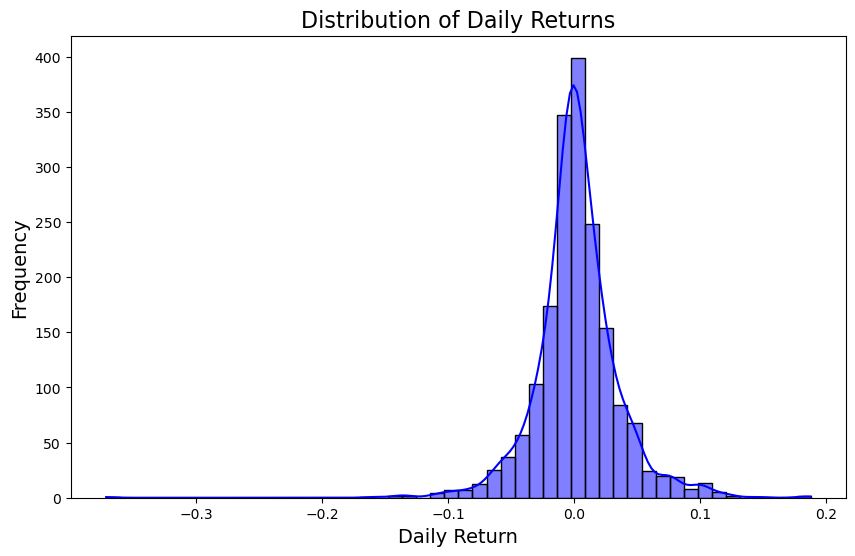

In [71]:
#analysing daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [72]:
df['Rolling std'] = df['Close'].rolling(window=30).std()


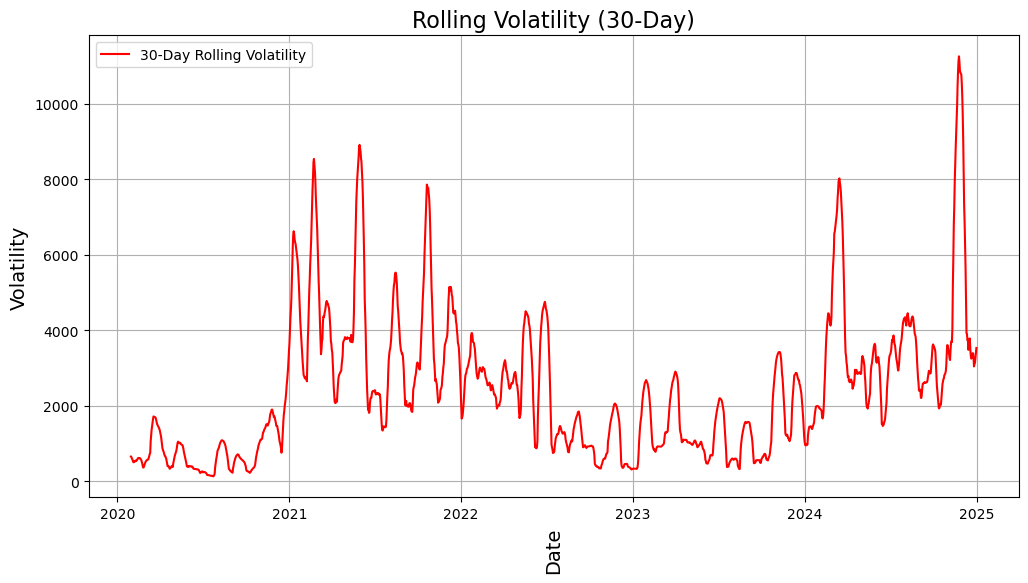

In [73]:
# Rolling volatility (30-day rolling standard deviation)
df['Rolling Std'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling Std'], label='30-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility (30-Day)', fontsize=16)
plt.xlabel('Date', fontsize=14,rotation=90)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

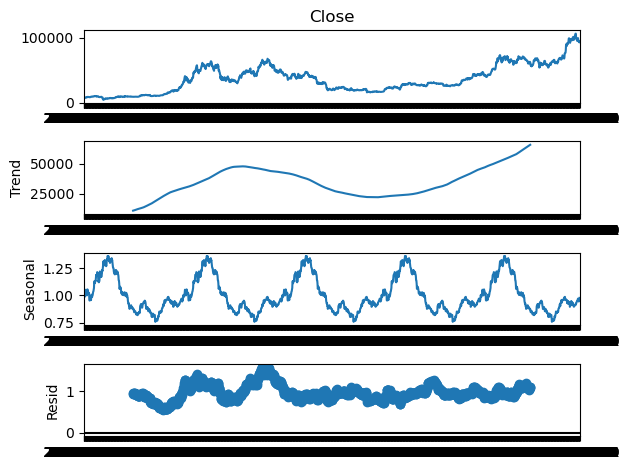

In [16]:
# Seasonal decomposition
decompose_result = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=365)
decompose_result.plot()
plt.show()

In [74]:
#resampling data to monthly average
average_yr = df1[['Close', 'High', 'Low', 'Open', 'Volume']].resample('M').mean()

C:\Users\Shedrack\AppData\Local\Temp\ipykernel_10488\3756077137.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  average_yr = df1[['Close', 'High', 'Low', 'Open', 'Volume']].resample('M').mean()


In [ ]:
decompose = seasonal_decompose(df1['Close'], model='multiplicative')
trend = decompose.trend
seasonality = decompose.seasonal
residual = decompose.resid
